In [ ]:
# HW#2
HW#2의 각 문항에 대한 실행 코드 블록을 HW#1과 동일한 방법으로 작성하시기 바랍니다.
201614792 컴퓨터공학과 강신규

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


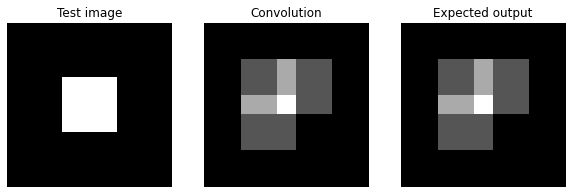

In [11]:
##1-A
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io

from __future__ import print_function

from filters import conv_nested

kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,0]
])

def conv_nested(image, kernel):
    """A naive implementation of convolution filter.

    This is a naive implementation of convolution using 4 nested for-loops.
    This function computes convolution of an image with a kernel and outputs
    the result that has the same shape as the input image.

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    ### YOUR CODE HERE
    for a in range(Hi):
        for b in range(Wi):
            sum=0
            for c in range(Hk):
                for d in range(Wk):
                    if a+1-d < 0 or b+1-d < 0 or a+1-c >= Hi or b+1-d >= Wi:
                        sum += 0
                    else:
                        sum += kernel[c][d] * image[a+1-c][b+1-d]
            out[a][b] = sum
                               
    ### END YOUR CODE

    return out

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) #set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

##def display(img):

##    plt.figure(figsize = (5,5))

##    plt.imshow(img,cmap='gray' if img.ndim == 2 else None)

 ##   plt.axis('off')

##    plt.show()



#Create a test image: white square in the middle
test_img = np.zeros((9,9))
test_img[3:6, 3:6] = 1

#Run your conv_nested function on the test image
test_output = conv_nested(test_img, kernel)

#Build the expected output
expected_output = np.zeros((9,9))
expected_output[2:7, 2:7] = 1
expected_output[5:, 5:] =0
expected_output[4, 2:5] =2
expected_output[2:5, 4] =2
expected_output[4,4] = 3

#Plot the test image
plt.subplot(1,3,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(test_output)
plt.title('Convolution')
plt.axis('off')

#Plot your convolved image
plt.subplot(1,3,3)
plt.imshow(expected_output)
plt.title('Expected output')
plt.axis('off')
plt.show()

#Test if the output matches expected output
assert np.max(test_output - expected_output) <1e-10, "Your solution is not correct"





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(300, 332)
(3, 3)


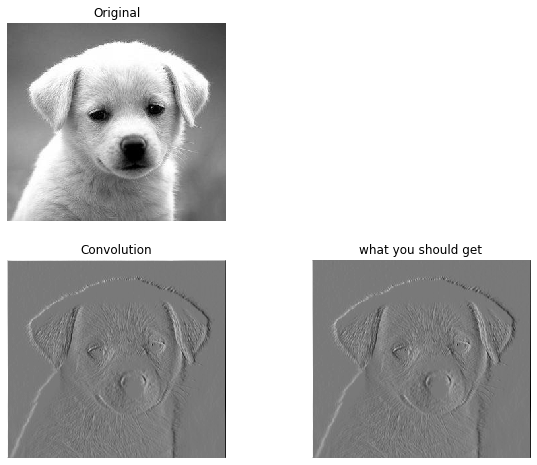

In [13]:
##1-B
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io

from __future__ import print_function

from filters import conv_nested

kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

def conv_nested(image, kernel):
    """A naive implementation of convolution filter.

    This is a naive implementation of convolution using 4 nested for-loops.
    This function computes convolution of an image with a kernel and outputs
    the result that has the same shape as the input image.

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
        
    """
    
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    ### YOUR CODE HERE
    for a in range(Hi):
        for b in range(Wi):
            sum=0
            for c in range(Hk):
                for d in range(Wk):
                    if a+1-d < 0 or b+1-d < 0 or a+1-c >= Hi or b+1-d >= Wi:
                        sum += 0
                    else:
                        sum += kernel[c][d] * image[a+1-c][b+1-d]
            out[a][b] = sum
                          
                               
    ### END YOUR CODE

    return out

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) #set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

##def display(img):

##    plt.figure(figsize = (5,5))

##    plt.imshow(img,cmap='gray' if img.ndim == 2 else None)

##    plt.axis('off')

##    plt.show()

img = io.imread('dog.jpg', as_gray=True)
out = conv_nested(img, kernel)


##Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')


#Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out)
plt.title('Convolution')
plt.axis('off')


#Plot what you should get
solution_img = io.imread('convoluted_dog.jpg',as_gray=True)
plt.subplot(2,2,4)
plt.imshow(solution_img)
plt.title('what you should get')
plt.axis('off')

plt.show()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
conv_nested: took 2.486555 seconds.
conv_fast: took 0.458438 seconds.


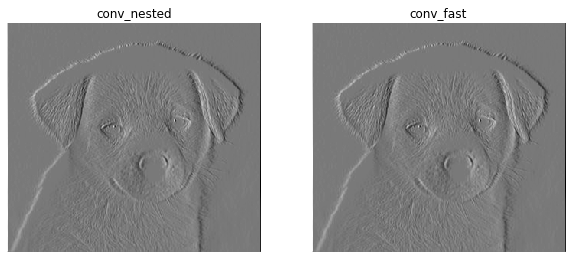

In [21]:
#1-C conv_fast 구현
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io

from __future__ import print_function

from filters import conv_nested
from filters import zero_pad
from filters import conv_fast



kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

def conv_nested(image, kernel):
    """A naive implementation of convolution filter.

    This is a naive implementation of convolution using 4 nested for-loops.
    This function computes convolution of an image with a kernel and outputs
    the result that has the same shape as the input image.

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
        
    """
    
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    ### YOUR CODE HERE
    for a in range(Hi):
        for b in range(Wi):
            sum=0
            for c in range(Hk):
                for d in range(Wk):
                    if a+1-d < 0 or b+1-d < 0 or a+1-c >= Hi or b+1-d >= Wi:
                        sum += 0
                    else:
                        sum += kernel[c][d] * image[a+1-c][b+1-d]
            out[a][b] = sum
                          
                               
    ### END YOUR CODE

    return out

def zero_pad(image, pad_height, pad_width):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_height = 1, pad_width = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W).
        pad_width: width of the zero padding (left and right padding).
        pad_height: height of the zero padding (bottom and top padding).

    Returns:
        out: numpy array of shape (H+2*pad_height, W+2*pad_width).
    """

    H, W = image.shape
    out = None

    ### YOUR CODE HERE
    
    out = np.zeros((H+2*pad_height, W+2*pad_width))
    out[pad_height: H+pad_height, pad_width: W+pad_width] = image
    
    ### END YOUR CODE
    return out

def conv_fast(image, kernel):
    """ An efficient implementation of convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute weighted sum of neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - There should be two nested for-loops
        - You may find np.flip() and np.sum() useful

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    ### YOUR CODE HERE
    kernel = np.flip(kernel,0)
    kernel = np.flip(kernel,1)
    image = zero_pad(image, Hk//2, Wk//2)
    for a in range(Hi):
        for b in range(Wi):
            out[a, b] = np.sum(image[a: a+Hk, b: b+Wk] * kernel)
            
    ### END YOUR CODE
    
    return out



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) #set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

img = io.imread('dog.jpg', as_gray=True)

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_nested = conv_nested(img,kernel)
t2 = time()


#compare the running time of the two implementations
print("conv_nested: took %f seconds." %(t2-t1))
print("conv_fast: took %f seconds." %(t1-t0))

#Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_nested)
plt.title('conv_nested')
plt.axis('off')

#Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

#Make sure that the two outputs are the same
if not (np.max(out_fast - out_nested) < 1e-10):
    print("Different outputs! check your implementation.")

cross-correlation에 의한 출력 결과가 기대한 것처럼 정확하게 상품을 검출할 수 있는가? 
실제 상품 사진을 template 으로 이용했을 때 생각처럼 동작하지 않는 이유가 무엇일지
노트북 파일에 markdown cell 을 만들고 그 안에 이유를 쓰시오:
잘 검출이 되지 않았다. 그 이유는 축소된 이미지에서 계산이 원활하게 이루어지지않기 때문에 검출이 되지 않습니다.



                                          

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


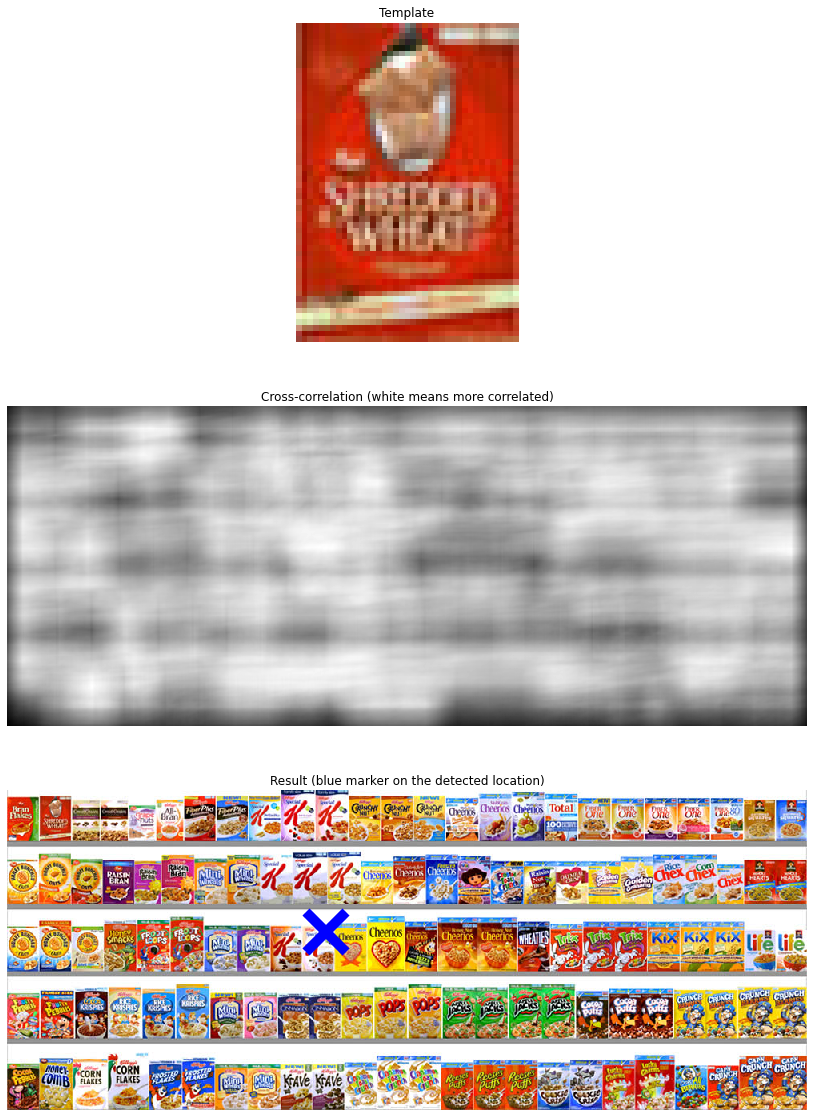

In [2]:
#2-A
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io

from __future__ import print_function

from filters import conv_nested
from filters import zero_pad
from filters import conv_fast
from filters import cross_correlation



kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

def conv_nested(image, kernel):
    """A naive implementation of convolution filter.

    This is a naive implementation of convolution using 4 nested for-loops.
    This function computes convolution of an image with a kernel and outputs
    the result that has the same shape as the input image.

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
        
    """
    
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    ### YOUR CODE HERE
    for a in range(Hi):
        for b in range(Wi):
            sum=0
            for c in range(Hk):
                for d in range(Wk):
                    if a+1-d < 0 or b+1-d < 0 or a+1-c >= Hi or b+1-d >= Wi:
                        sum += 0
                    else:
                        sum += kernel[c][d] * image[a+1-c][b+1-d]
            out[a][b] = sum
                          
                               
    ### END YOUR CODE

    return out

def zero_pad(image, pad_height, pad_width):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_height = 1, pad_width = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W).
        pad_width: width of the zero padding (left and right padding).
        pad_height: height of the zero padding (bottom and top padding).

    Returns:
        out: numpy array of shape (H+2*pad_height, W+2*pad_width).
    """

    H, W = image.shape
    out = None

    ### YOUR CODE HERE
    
    out = np.zeros((H+2*pad_height, W+2*pad_width))
    out[pad_height: H+pad_height, pad_width: W+pad_width] = image
    
    ### END YOUR CODE
    return out

def conv_fast(image, kernel):
    """ An efficient implementation of convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute weighted sum of neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - There should be two nested for-loops
        - You may find np.flip() and np.sum() useful

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    ### YOUR CODE HERE
    kernel = np.flip(kernel,0)
    kernel = np.flip(kernel,1)
    image = zero_pad(image, Hk//2, Wk//2)
    for a in range(Hi):
        for b in range(Wi):
            out[a, b] = np.sum(image[a: a+Hk, b: b+Wk] * kernel)
            
    ### END YOUR CODE
    
    return out

def cross_correlation(f, g):
    """ Cross-correlation of f and g.

    Hint: use the conv_fast function defined above.

    Args:
        f: numpy array of shape (Hf, Wf).
        g: numpy array of shape (Hg, Wg).

    Returns:
        out: numpy array of shape (Hf, Wf).
    """

    out = None
    ### YOUR CODE HERE
    g = np.flip(np.flip(g,0),1)
    out = conv_fast(f,g)
    ### END YOUR CODE

    return out



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) #set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

#Load template and image in gratscale

img = io.imread('shelf.jpg')
img_grey = io.imread('shelf.jpg', as_gray=True)
temp = io.imread('template.jpg')
temp_grey = io.imread('template.jpg', as_gray=True)

#Perform cross-correlation between the image and the template
out = cross_correlation(img_grey, temp_grey)

#Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

#Display product template
plt.figure(figsize=(25,20))
plt.subplot(3,1,1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

#Display cross-correlation output
plt.subplot(3,1,2)
plt.imshow(out)
plt.title('Cross-correlation (white means more correlated)')
plt.axis('off')

#Display image
plt.subplot(3,1,3)
plt.imshow(img)
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

#Draw marker at detected location
plt.plot(x,y,'bx', ms=40, mew=10)
plt.show()




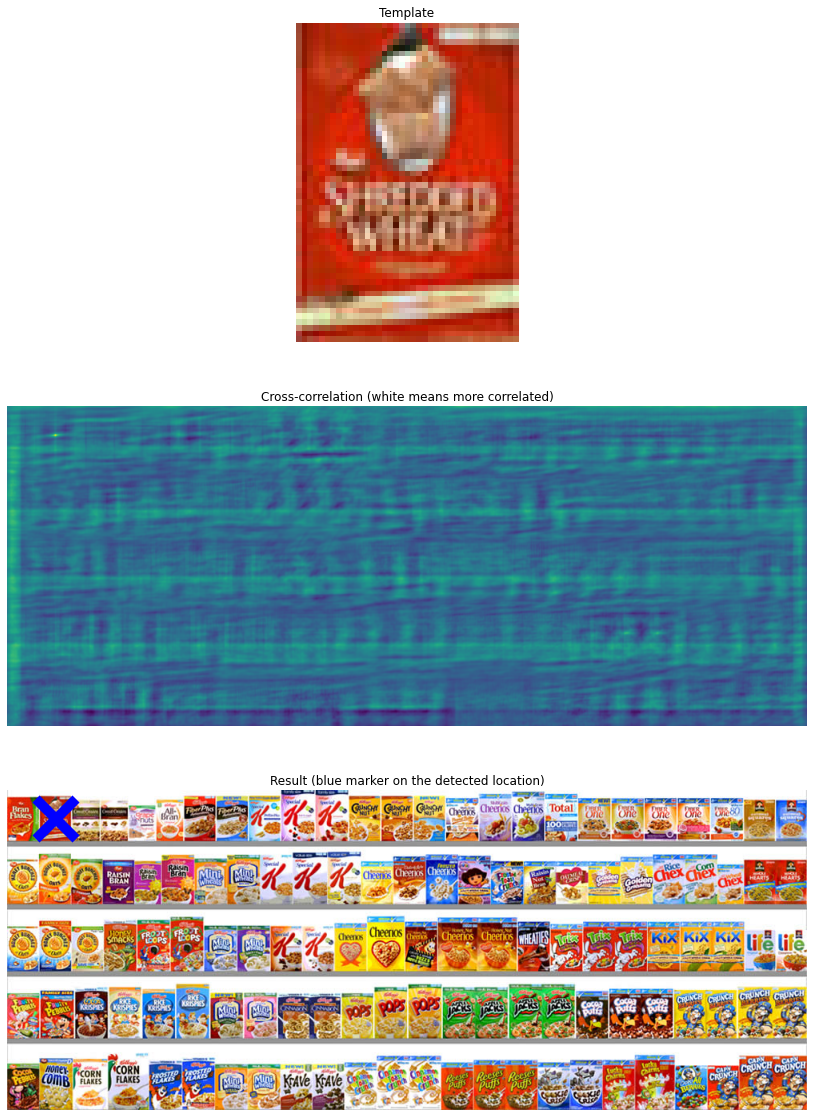

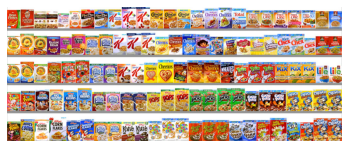

The product is on the shelf


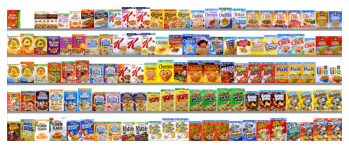

The product is not on the shelf


In [1]:
#2-B
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io

from __future__ import print_function

from filters import conv_nested
from filters import zero_pad
from filters import conv_fast
from filters import cross_correlation
from filters import zero_mean_cross_correlation



kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

def conv_nested(image, kernel):
    """A naive implementation of convolution filter.

    This is a naive implementation of convolution using 4 nested for-loops.
    This function computes convolution of an image with a kernel and outputs
    the result that has the same shape as the input image.

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
        
    """
    
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    ### YOUR CODE HERE
    for a in range(Hi):
        for b in range(Wi):
            sum=0
            for c in range(Hk):
                for d in range(Wk):
                    if a+1-d < 0 or b+1-d < 0 or a+1-c >= Hi or b+1-d >= Wi:
                        sum += 0
                    else:
                        sum += kernel[c][d] * image[a+1-c][b+1-d]
            out[a][b] = sum
                          
                               
    ### END YOUR CODE

    return out

def zero_pad(image, pad_height, pad_width):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_height = 1, pad_width = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W).
        pad_width: width of the zero padding (left and right padding).
        pad_height: height of the zero padding (bottom and top padding).

    Returns:
        out: numpy array of shape (H+2*pad_height, W+2*pad_width).
    """

    H, W = image.shape
    out = None

    ### YOUR CODE HERE
    
    out = np.zeros((H+2*pad_height, W+2*pad_width))
    out[pad_height: H+pad_height, pad_width: W+pad_width] = image
    
    ### END YOUR CODE
    return out

def conv_fast(image, kernel):
    """ An efficient implementation of convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute weighted sum of neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - There should be two nested for-loops
        - You may find np.flip() and np.sum() useful

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    ### YOUR CODE HERE
    kernel = np.flip(kernel,0)
    kernel = np.flip(kernel,1)
    image = zero_pad(image, Hk//2, Wk//2)
    for a in range(Hi):
        for b in range(Wi):
            out[a, b] = np.sum(image[a: a+Hk, b: b+Wk] * kernel)
            
    ### END YOUR CODE
    
    return out

def cross_correlation(f, g):
    """ Cross-correlation of f and g.

    Hint: use the conv_fast function defined above.

    Args:
        f: numpy array of shape (Hf, Wf).
        g: numpy array of shape (Hg, Wg).

    Returns:
        out: numpy array of shape (Hf, Wf).
    """

    out = None
    ### YOUR CODE HERE
    g = np.flip(np.flip(g,0),1)
    out = conv_fast(f,g)
    ### END YOUR CODE

    return out

def zero_mean_cross_correlation(f, g):
    """ Zero-mean cross-correlation of f and g.

    Subtract the mean of g from g so that its mean becomes zero.

    Hint: you should look up useful numpy functions online for calculating the mean.

    Args:
        f: numpy array of shape (Hf, Wf).
        g: numpy array of shape (Hg, Wg).

    Returns:
        out: numpy array of shape (Hf, Wf).
    """

    out = None
    ### YOUR CODE HERE
    g= g-np.mean(g)
    out= cross_correlation(f, g)
    ### END YOUR CODE

    return out

def check_product_on_shelf(shelf,product):
    out = zero_mean_cross_correlation(shelf,product)
    
    #Scale output by the size of the template
    out = out/float(product.shape[0]*product.shape[1])
    
    #Threshhold output
    
    out = out >0.025
    
    if (np.sum(out) > 0.025):
        print('The product is on the shelf')
    else:
        print('The product is not on the shelf')
        



img = io.imread('shelf.jpg')
img_grey = io.imread('shelf.jpg', as_gray=True)
temp = io.imread('template.jpg')
temp_grey = io.imread('template.jpg', as_gray=True)


#Perform cross-correlation between the image and the template
out = zero_mean_cross_correlation(img_grey, temp_grey)

#Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

#Display product template
plt.figure(figsize=(30,20))
plt.subplot(3,1,1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

#Display cross-correlation output
plt.subplot(3,1,2)
plt.imshow(out)
plt.title('Cross-correlation (white means more correlated)')
plt.axis('off')

#Display image
plt.subplot(3,1,3)
plt.imshow(img)
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

#Draw marker at detected location
plt.plot(x,y,'bx', ms=40, mew=10)
plt.show()

#Load image of the shelf without the product

img2 = io.imread('shelf_soldout.jpg')
img2_grey = io.imread('shelf_soldout.jpg', as_gray=True)

plt.imshow(img)
plt.axis('off')
plt.show()
check_product_on_shelf(img_grey, temp_grey)

plt.imshow(img2)
plt.axis('off')
plt.show()
check_product_on_shelf(img2_grey, temp_grey)


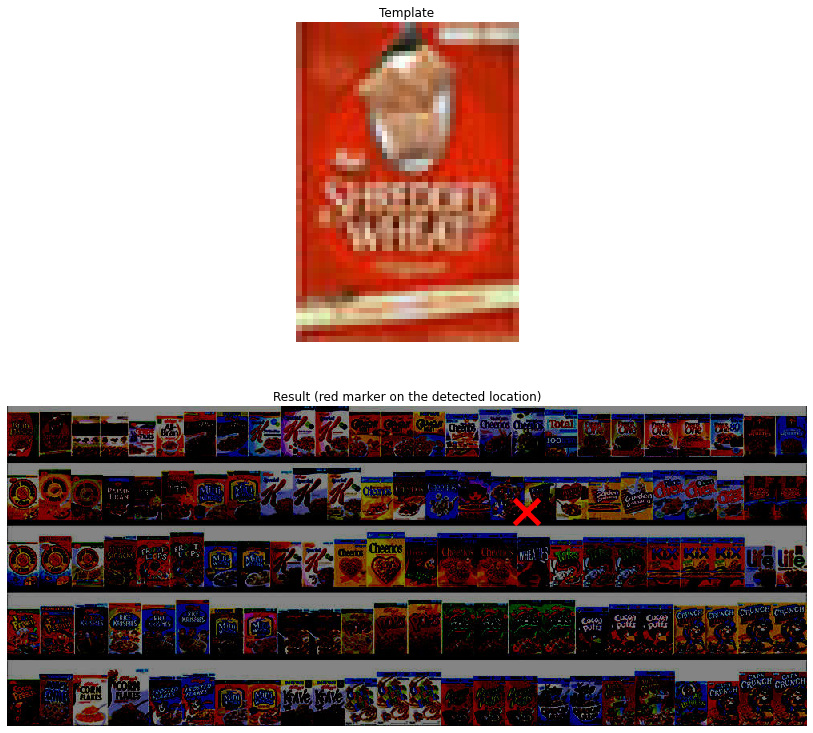

In [20]:
#2-C
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io

from __future__ import print_function

from filters import conv_nested
from filters import zero_pad
from filters import conv_fast
from filters import cross_correlation
from filters import zero_mean_cross_correlation
from filters import normalized_cross_correlation



kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

def normalized_cross_correlation(f, g):
    """ Normalized cross-correlation of f and g.

    Normalize the subimage of f and the template g at each step
    before computing the weighted sum of the two.

    Hint: you should look up useful numpy functions online for calculating 
          the mean and standard deviation.

    Args:
        f: numpy array of shape (Hf, Wf).
        g: numpy array of shape (Hg, Wg).

    Returns:
        out: numpy array of shape (Hf, Wf).
    """

    out = None
    ### YOUR CODE HERE
    f = (f - np.mean(f))/np.var(f)
    g = (g - np.mean(g))/np.var(g)
    out = cross_correlation(f, g)
    ### END YOUR CODE

    return out



def conv_nested(image, kernel):
    """A naive implementation of convolution filter.

    This is a naive implementation of convolution using 4 nested for-loops.
    This function computes convolution of an image with a kernel and outputs
    the result that has the same shape as the input image.

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
        
    """
    
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    ### YOUR CODE HERE
    for a in range(Hi):
        for b in range(Wi):
            sum=0
            for c in range(Hk):
                for d in range(Wk):
                    if a+1-d < 0 or b+1-d < 0 or a+1-c >= Hi or b+1-d >= Wi:
                        sum += 0
                    else:
                        sum += kernel[c][d] * image[a+1-c][b+1-d]
            out[a][b] = sum
                          
                               
    ### END YOUR CODE

    return out

def zero_pad(image, pad_height, pad_width):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_height = 1, pad_width = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W).
        pad_width: width of the zero padding (left and right padding).
        pad_height: height of the zero padding (bottom and top padding).

    Returns:
        out: numpy array of shape (H+2*pad_height, W+2*pad_width).
    """

    H, W = image.shape
    out = None

    ### YOUR CODE HERE
    
    out = np.zeros((H+2*pad_height, W+2*pad_width))
    out[pad_height: H+pad_height, pad_width: W+pad_width] = image
    
    ### END YOUR CODE
    return out

def conv_fast(image, kernel):
    """ An efficient implementation of convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute weighted sum of neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - There should be two nested for-loops
        - You may find np.flip() and np.sum() useful

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    ### YOUR CODE HERE
    kernel = np.flip(kernel,0)
    kernel = np.flip(kernel,1)
    image = zero_pad(image, Hk//2, Wk//2)
    for a in range(Hi):
        for b in range(Wi):
            out[a, b] = np.sum(image[a: a+Hk, b: b+Wk] * kernel)
            
    ### END YOUR CODE
    
    return out

def cross_correlation(f, g):
    """ Cross-correlation of f and g.

    Hint: use the conv_fast function defined above.

    Args:
        f: numpy array of shape (Hf, Wf).
        g: numpy array of shape (Hg, Wg).

    Returns:
        out: numpy array of shape (Hf, Wf).
    """

    out = None
    ### YOUR CODE HERE
    g = np.flip(np.flip(g,0),1)
    out = conv_fast(f,g)
    ### END YOUR CODE

    return out

def zero_mean_cross_correlation(f, g):
    """ Zero-mean cross-correlation of f and g.

    Subtract the mean of g from g so that its mean becomes zero.

    Hint: you should look up useful numpy functions online for calculating the mean.

    Args:
        f: numpy array of shape (Hf, Wf).
        g: numpy array of shape (Hg, Wg).

    Returns:
        out: numpy array of shape (Hf, Wf).
    """

    out = None
    ### YOUR CODE HERE
    g= g-np.mean(g)
    out= cross_correlation(f, g)
    ### END YOUR CODE

    return out

def check_product_on_shelf(shelf,product):
    out = zero_mean_cross_correlation(shelf,product)
    
    #Scale output by the size of the template
    out = out / float(product.shape[0]*product.shape[1])
    
    #Threshhold output
    
    out = out >0.025
    
   # print(np.sum(out))
    if np.sum(out) > 0:
        print('The product is on the shelf')
    else:
        print('The product is not on the shelf')
        



img = io.imread('shelf_dark.jpg')
img_grey = io.imread('shelf_dark.jpg', as_gray=True)

temp = io.imread('template.jpg')
temp_grey = io.imread('template.jpg', as_gray=True)


#Perform normalized corss
out = normalized_cross_correlation(img_grey, temp_grey)

#Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

#Display product template
plt.figure(figsize=(30,20))
plt.subplot(3,1,1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

#Display cross-correlation output
plt.subplot(3,1,2)
plt.imshow(out)
plt.title('normalized_Cross-correlation')
plt.axis('off')

#Display image
plt.imshow(img)
plt.title('Result (red marker on the detected location)')
plt.axis('off')

#Draw marker at detected location
plt.plot(x,y,'rx', ms=25, mew=5)
plt.show()


